In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import os
import zipfile
import tempfile
from google.colab import files

# Upload a zip file from your local system
uploaded = files.upload()

# Create a temporary directory to extract the files
temp_dir = tempfile.mkdtemp()

# Code via ChatGPT to unzip the archive into a temporary directory
for filename in uploaded.keys():
    # Construct the path to the uploaded file
    uploaded_file_path = os.path.join(temp_dir, filename)

    # Write the uploaded file to the temporary directory
    with open(uploaded_file_path, 'wb') as f:
        f.write(uploaded[filename])

    # Check if the file is a zip file
    if zipfile.is_zipfile(uploaded_file_path):
        # Extract the zip file into the temporary directory
        with zipfile.ZipFile(uploaded_file_path, 'r') as zip_ref:
            zip_ref.extractall(temp_dir)
        print('Extracted file "{name}"'.format(name=filename))
    else:
        print('Uploaded file "{name}" is not a zip file'.format(name=filename))

# List the files in the temporary directory
print('Files in temporary directory:', os.listdir(temp_dir))

Saving diabetes-archive.zip to diabetes-archive.zip
Extracted file "diabetes-archive.zip"
Files in temporary directory: ['diabetes-archive.zip', 'diabetes.csv']


In [ ]:
df = pd.read_csv(temp_dir + "/diabetes.csv", index_col="patient_number")

In [ ]:
# Columns that need decimal conversion
columns_with_comma_decimal = ['chol_hdl_ratio', 'bmi', 'waist_hip_ratio']
for column in columns_with_comma_decimal:
    df[column] = df[column].astype(str).str.replace(',', '.').astype(float)

# Encode the 'gender' column
df['gender'] = df['gender'].map({'male': 0, 'female': 1})

# Encode the 'diabetes' column
df['diabetes'] = df['diabetes'].map({'No diabetes': 0, 'Diabetes': 1})

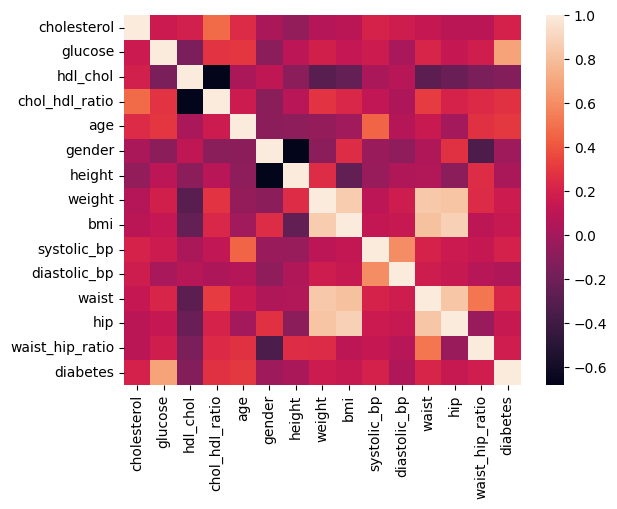

In [ ]:
sns.heatmap(df.corr(numeric_only=False));

In [ ]:
sns.pairplot(data=df, hue="diabetes")

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
y = df["diabetes"]
X = df.drop("diabetes", axis=1)

In [ ]:
X

,cholesterol,glucose,hdl_chol,chol_hdl_ratio,age,gender,height,weight,bmi,systolic_bp,diastolic_bp,waist,hip,waist_hip_ratio
patient_number,,,,,,,,,,,,,,
1,193,77,49,3.9,19,1,61,119,22.5,118,70,32,38,0.84
2,146,79,41,3.6,19,1,60,135,26.4,108,58,33,40,0.83
3,217,75,54,4.0,20,1,67,187,29.3,110,72,40,45,0.89
4,226,97,70,3.2,20,1,64,114,19.6,122,64,31,39,0.79
5,164,91,67,2.4,20,1,70,141,20.2,122,86,32,39,0.82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386,227,105,44,5.2,83,1,59,125,25.2,150,90,35,40,0.88
387,226,279,52,4.3,84,1,60,192,37.5,144,88,41,48,0.85
388,301,90,118,2.6,89,1,61,115,21.7,218,90,31,41,0.76


In [ ]:
y

patient_number
1      0
2      0
3      0
4      0
5      0
      ..
386    0
387    1
388    0
389    1
390    0
Name: diabetes, Length: 390, dtype: int64

In [ ]:
#Seperate out the Target and Features
y = df["diabetes"]
X = df.drop("diabetes", axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize Naive Bayes classifier - Mixed because there is a combination of continuous and categorical features
clf = LogisticRegression()

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = clf.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9102564102564102


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


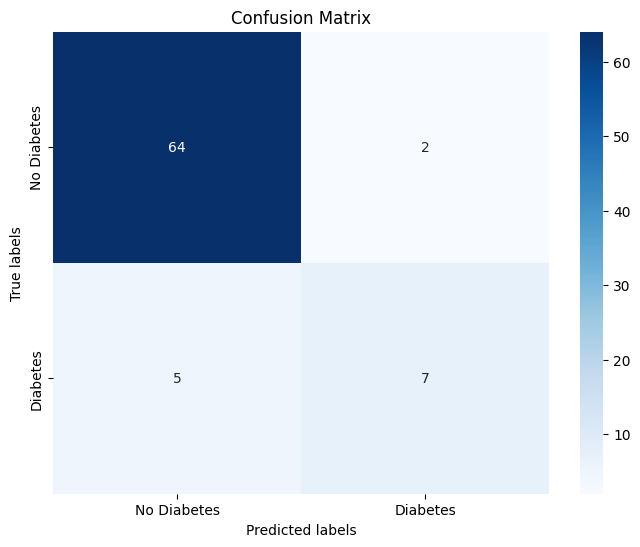

In [ ]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Define the labels for the matrix
target_names = ["No Diabetes", "Diabetes"]

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

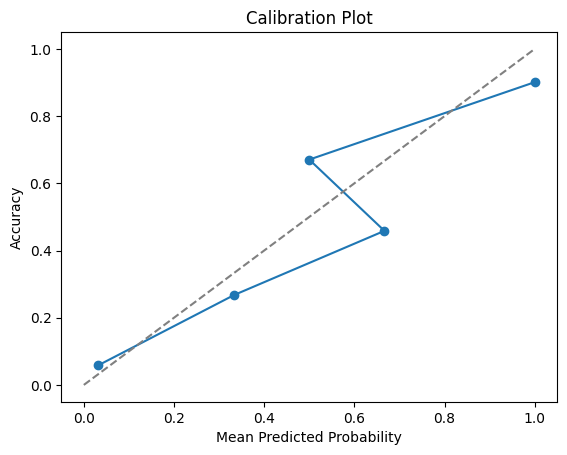

In [ ]:
from sklearn.calibration import calibration_curve

# Generate predicted probabilities on the test set
probabilities = clf.predict_proba(X_test)[:, 1]

# Group predictions into bins and calculate mean probability and accuracy
mean_predicted_prob, accuracy = calibration_curve(y_test, probabilities, n_bins=5, strategy='uniform')

# Plot calibration curve
plt.plot(mean_predicted_prob, accuracy, marker='o', linestyle='-')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # diagonal line for reference
plt.xlabel('Mean Predicted Probability')
plt.ylabel('Accuracy')
plt.title('Calibration Plot')
plt.show()